Test Function


In [213]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import cython as cpy

'''
Funzioni che devo implementare:
	- generazione	IMF  = (m/m0)^-alpha	alpha = 2
	  distrubuzione	m/m0 = IMF^(-1/alpha)
	  m in [0.1,20]
	- luminosità	L/L0 = (m/m0)^beta	beta  = 3
	- 

'''
# dimension of the matrix
N = int(1e2)
# number of stars
M = int(50)

# Set parameters
alpha = 2
beta  = 3
m_min = 0.1; m_max = 20

IMF = lambda m : m**(-alpha)
IMF_min = IMF(0.1); IMF_max = IMF(20) 




0.10034659611469338 0.5925036377661814


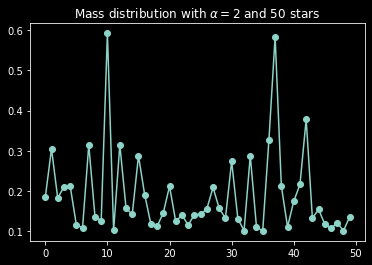

In [226]:
def random_mass(min,max):
	np.random.seed()
	imf = np.random.rand(M)*(max-min)+min
	return imf**(-1/alpha)

def generate_mass_array(min,max):
	return random_mass(min,max)

m = generate_mass_array(IMF_min,IMF_max)


print(min(m), max(m))

plt.title(f'Mass distribution with $\\alpha = {alpha}$ and {M} stars')
plt.plot(m,'o-')

plt.show()



0.0010000000000000002 8000
0.001010433963737016 0.2080046593301844


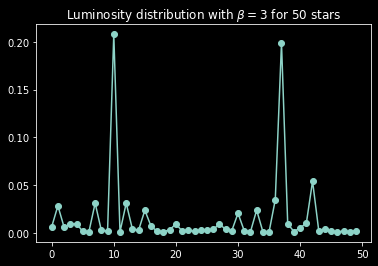

In [227]:
L = m**beta

print(0.1**beta,20**beta)
print(min(L), max(L))
plt.title(f'Luminosity distribution with $\\beta = {beta}$ for {M} stars')
plt.plot(L,'o-')

plt.show()

In [228]:
class star(object):
	def __init__(self,mass, lum, x ,y):
		self.m   = mass		# star mass value
		self.lum = lum		# star luminosity value
		self.x = x		# star x coordinate
		self.y = y		# star y coordinate

def star_location(n):
	tmp = np.random.default_rng()
	X = tmp.choice(N, size=n)
	Y = tmp.choice(N, size=n, replace=False)
	return X, Y	
	# for i in range(0,n):
	# 	x = rnd.randint(0,N-1)
	# 	y = rnd.randint(0,N-1)
	# 	while((x in X) and (y in Y)):
	# 		x = rnd.randint(0,N-1)
	# 		y = rnd.randint(0,N-1)
	# 	X.append(x); Y.append(y)
	# X = np.array(X); Y = np.array(Y)


def transfer_function(l):
	inf = 9e-4; sup = 8000;
	return(np.log10(l)-np.log10(inf))/(np.log10(sup)-np.log10(inf))

def exposure(F,X,Y,val):
	for i in range(3):
		F[X,Y,i] = transfer_function(val)
	# for i in range(dim):
	# 	F[X[i],Y[i],:] = transfer_function(val[i])
	return F



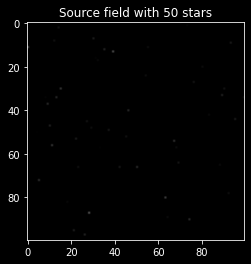

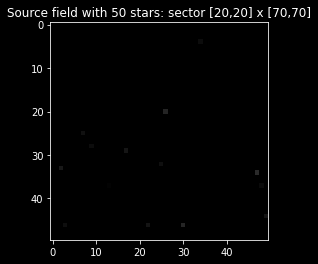

In [242]:

#! Da risolvere problema colore
def initialize():
	F = np.zeros([N,N,3])
	m = generate_mass_array(IMF_min,IMF_max)
	L = m**beta
	xs,ys = star_location(M)
	F = exposure(F,xs,ys,L)
	S = star(m,L,xs,ys)
	return F, S

def fov(F,inf=[0,0],sup=[int(N/3),int(N/3)]):
	if((inf[0]<0) or (inf[1]<0) or (sup[0]>=N) or (sup[1]>=N)):
		print('Error')
		return F
	return F[inf[0]:sup[0],inf[1]:sup[1],:] 

F, S = initialize()
Ls = S.lum
inf = [20,20]
sup = [70,70]
field = fov(F,inf,sup)

plt.figure(1)
plt.title(f'Source field with {M} stars')
plt.imshow(F)
plt.figure(2)
plt.title(f'Source field with {M} stars: sector [{inf[0]},{inf[1]}] x [{sup[0]},{sup[1]}]')
plt.imshow(field)
plt.show()

In [33]:
def gaussian(r,sigma=2):
	return np.exp(r**2/sigma**2)

def lorentzian(r,rs,a=4):
	return 1/( (r-rs)**2 + a**2 )

def atm_seeing(s_psf='g'):
	

IndentationError: expected an indented block (3871236329.py, line 8)